In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from portfoliolab.clustering import HierarchicalRiskParity

In [14]:
df0=pd.read_csv('APTECHT.NS.csv')[['Date', 'Close']]
df1=pd.read_csv('ATFL.NS.csv')['Close']
df2=pd.read_csv('FORTIS.NS.csv')['Close']
df3=pd.read_csv('MCX.NS.csv')['Close']
df4=pd.read_csv('TATACOMM.NS.csv')['Close']
df5=pd.read_csv('TITAN.NS.csv')['Close']
df6=pd.read_csv('TV18BRDCST.NS.csv')['Close']

df=pd.concat([df0, df1, df2, df3, df4, df5, df6], axis=1)
df.columns=['Date', 'APTECHT.NS', 'ATFL.NS', 'FORTIS.NS', 'MCX.NS', 'TATACOMM.NS','TITAN.NS', 'TV18BRDCST.NS']
df.to_csv('data.csv')

In [15]:
df.head(3)

,Date,APTECHT.NS,ATFL.NS,FORTIS.NS,MCX.NS,TATACOMM.NS,TITAN.NS,TV18BRDCST.NS
0,2016-06-13,78.750000,522.200012,161.800003,999.400024,449.100006,376.350006,42.099998
1,2016-06-20,72.300003,519.799988,155.800003,959.950012,447.799988,390.450012,40.549999
2,2016-06-27,76.849998,521.299988,159.250000,1008.950012,478.899994,405.850006,45.549999


In [17]:
data=pd.read_csv('data.csv')
stock_prices=data.copy()
stock_prices.head()

,Date,APTECHT.NS,ATFL.NS,FORTIS.NS,MCX.NS,TATACOMM.NS,TITAN.NS,TV18BRDCST.NS
0,13-06-2016,78.750000,522.200012,161.800003,999.400024,449.100006,376.350006,42.099998
1,20-06-2016,72.300003,519.799988,155.800003,959.950012,447.799988,390.450012,40.549999
2,27-06-2016,76.849998,521.299988,159.250000,1008.950012,478.899994,405.850006,45.549999
3,04-07-2016,73.650002,514.750000,158.850006,1065.099976,479.100006,401.450012,45.750000
4,11-07-2016,72.949997,510.100006,169.949997,1018.650024,464.750000,417.750000,40.799999


In [21]:
stock_prices['Date']=pd.to_datetime(stock_prices['Date'])
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           263 non-null    datetime64[ns]
 1   APTECHT.NS     262 non-null    float64       
 2   ATFL.NS        262 non-null    float64       
 3   FORTIS.NS      262 non-null    float64       
 4   MCX.NS         262 non-null    float64       
 5   TATACOMM.NS    262 non-null    float64       
 6   TITAN.NS       262 non-null    float64       
 7   TV18BRDCST.NS  262 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 16.6 KB


In [23]:
stock_prices.set_index('Date', inplace=True)


In [24]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 263 entries, 2016-06-13 to 2021-06-14
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   APTECHT.NS     262 non-null    float64
 1   ATFL.NS        262 non-null    float64
 2   FORTIS.NS      262 non-null    float64
 3   MCX.NS         262 non-null    float64
 4   TATACOMM.NS    262 non-null    float64
 5   TITAN.NS       262 non-null    float64
 6   TV18BRDCST.NS  262 non-null    float64
dtypes: float64(7)
memory usage: 16.4 KB


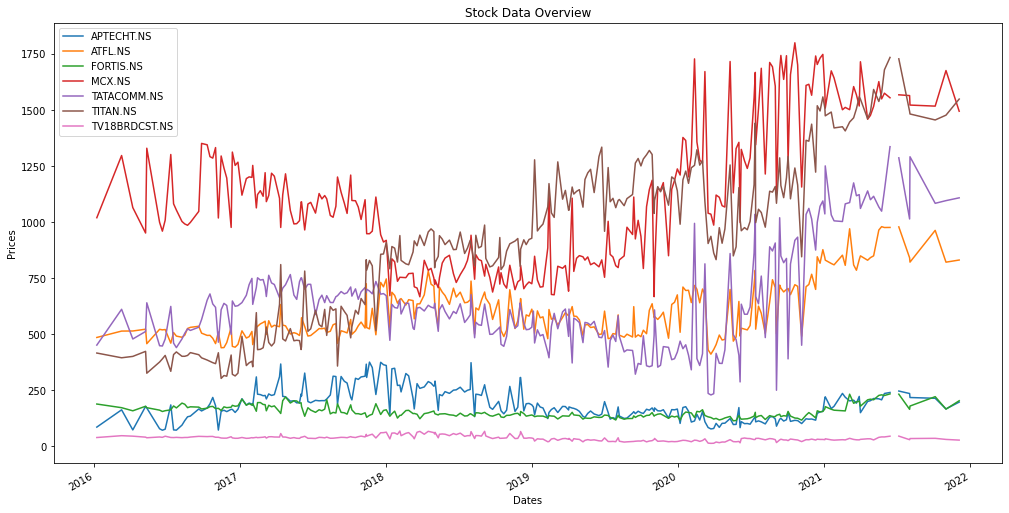

In [25]:
stock_prices.plot(figsize=(17,9))
plt.ylabel('Prices')
plt.xlabel('Dates')
plt.title('Stock Data Overview')
plt.show()

In [26]:
corr = stock_prices.corr()
  
corr.style.background_gradient(cmap ='coolwarm')

,APTECHT.NS,ATFL.NS,FORTIS.NS,MCX.NS,TATACOMM.NS,TITAN.NS,TV18BRDCST.NS
APTECHT.NS,1.000000,0.261880,0.223751,-0.259253,0.255755,-0.135579,0.724720
ATFL.NS,0.261880,1.000000,0.307338,0.470260,0.709928,0.701341,0.183907
FORTIS.NS,0.223751,0.307338,1.000000,0.336230,0.524105,-0.171983,0.241379
MCX.NS,-0.259253,0.470260,0.336230,1.000000,0.650909,0.334718,-0.318602
TATACOMM.NS,0.255755,0.709928,0.524105,0.650909,1.000000,0.348762,0.188882
TITAN.NS,-0.135579,0.701341,-0.171983,0.334718,0.348762,1.000000,-0.367208
TV18BRDCST.NS,0.724720,0.183907,0.241379,-0.318602,0.188882,-0.367208,1.000000


In [27]:
hrp=HierarchicalRiskParity()
hrp.allocate(asset_names=stock_prices.columns,
            asset_prices=stock_prices,
            linkage='single')

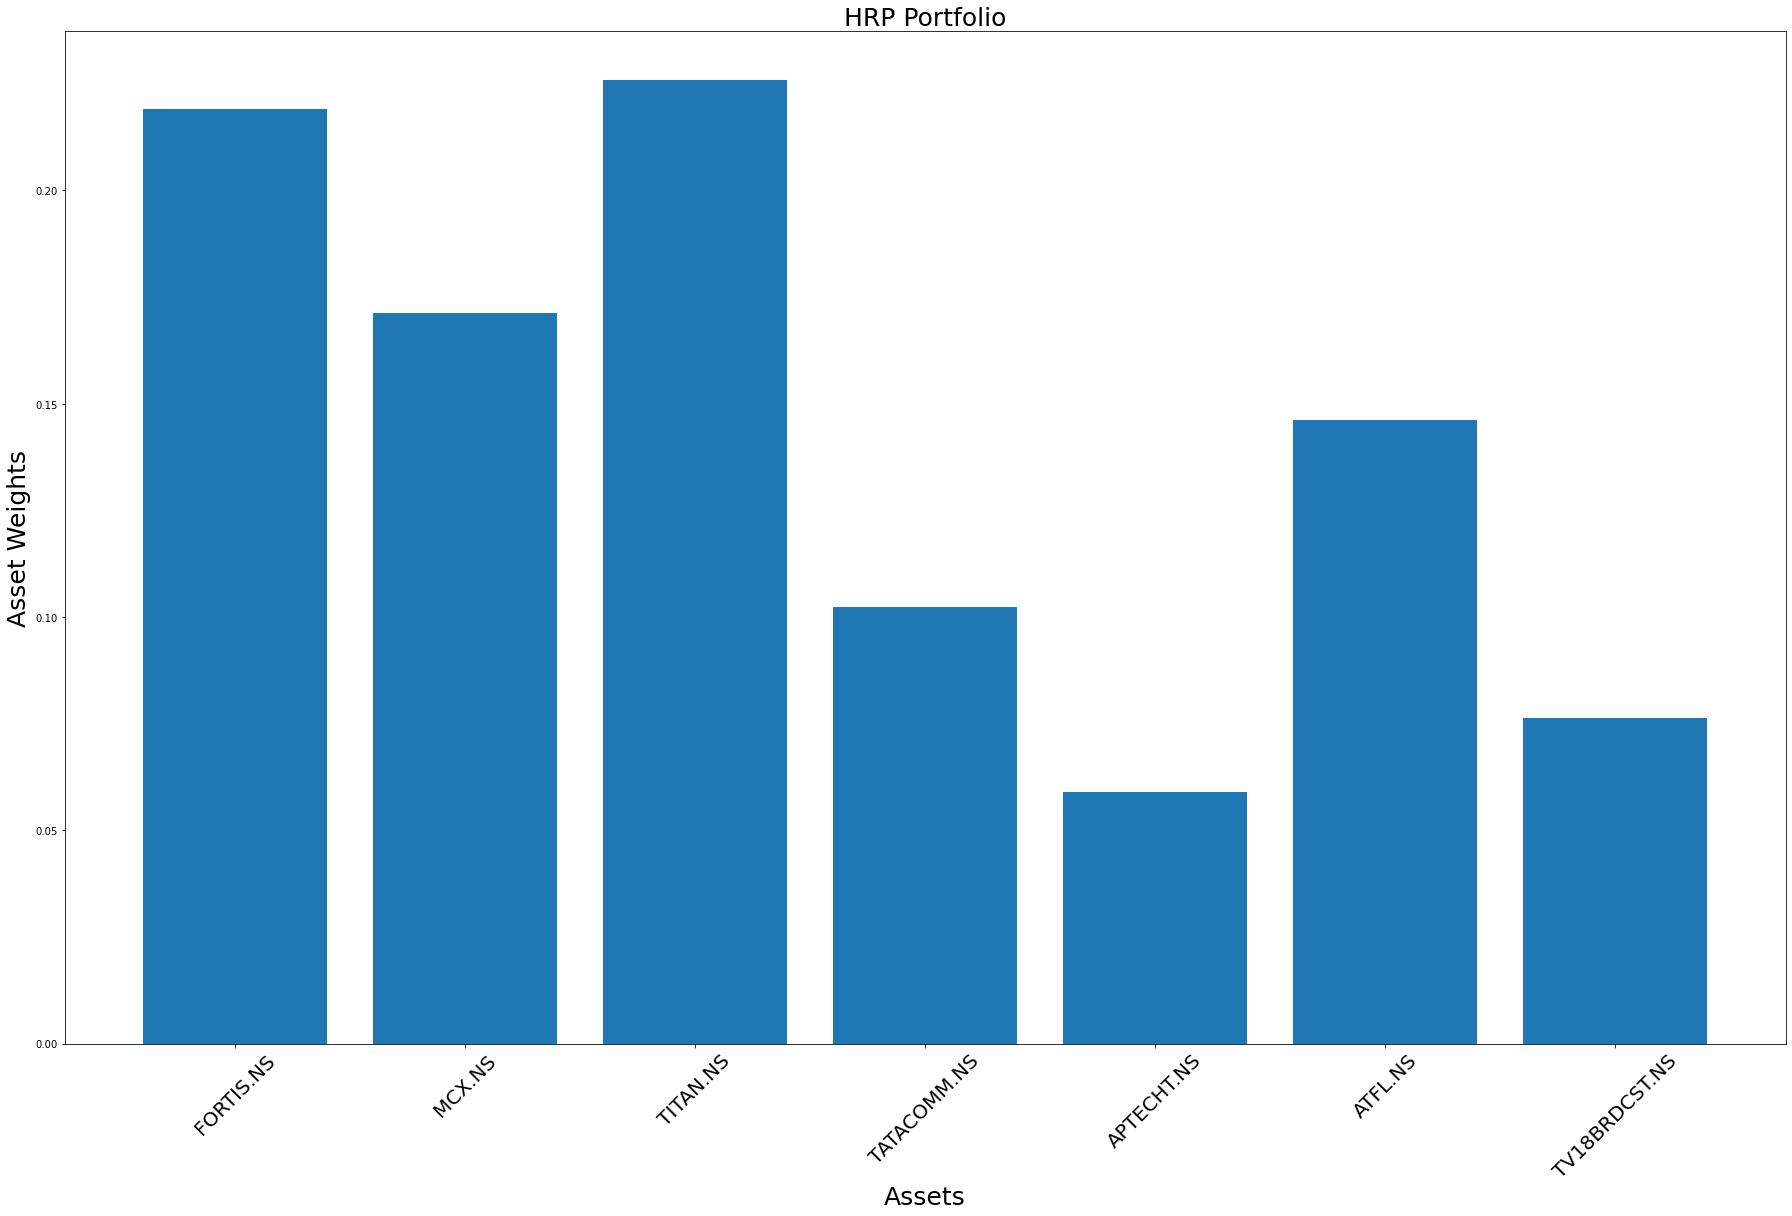

In [28]:
hrp_weights=hrp.weights
y_pos=np.arange(len(hrp_weights.columns))

plt.figure(figsize=(25, 17))
plt.bar(list(hrp_weights.columns), hrp_weights.values[0])
plt.xticks(y_pos, rotation=45, size=20)
plt.xlabel('Assets', size=25)
plt.ylabel('Asset Weights', size=25)
plt.title('HRP Portfolio', size=25)
plt.tight_layout()
plt.savefig('HRP Portfolio Weights')
plt.show()

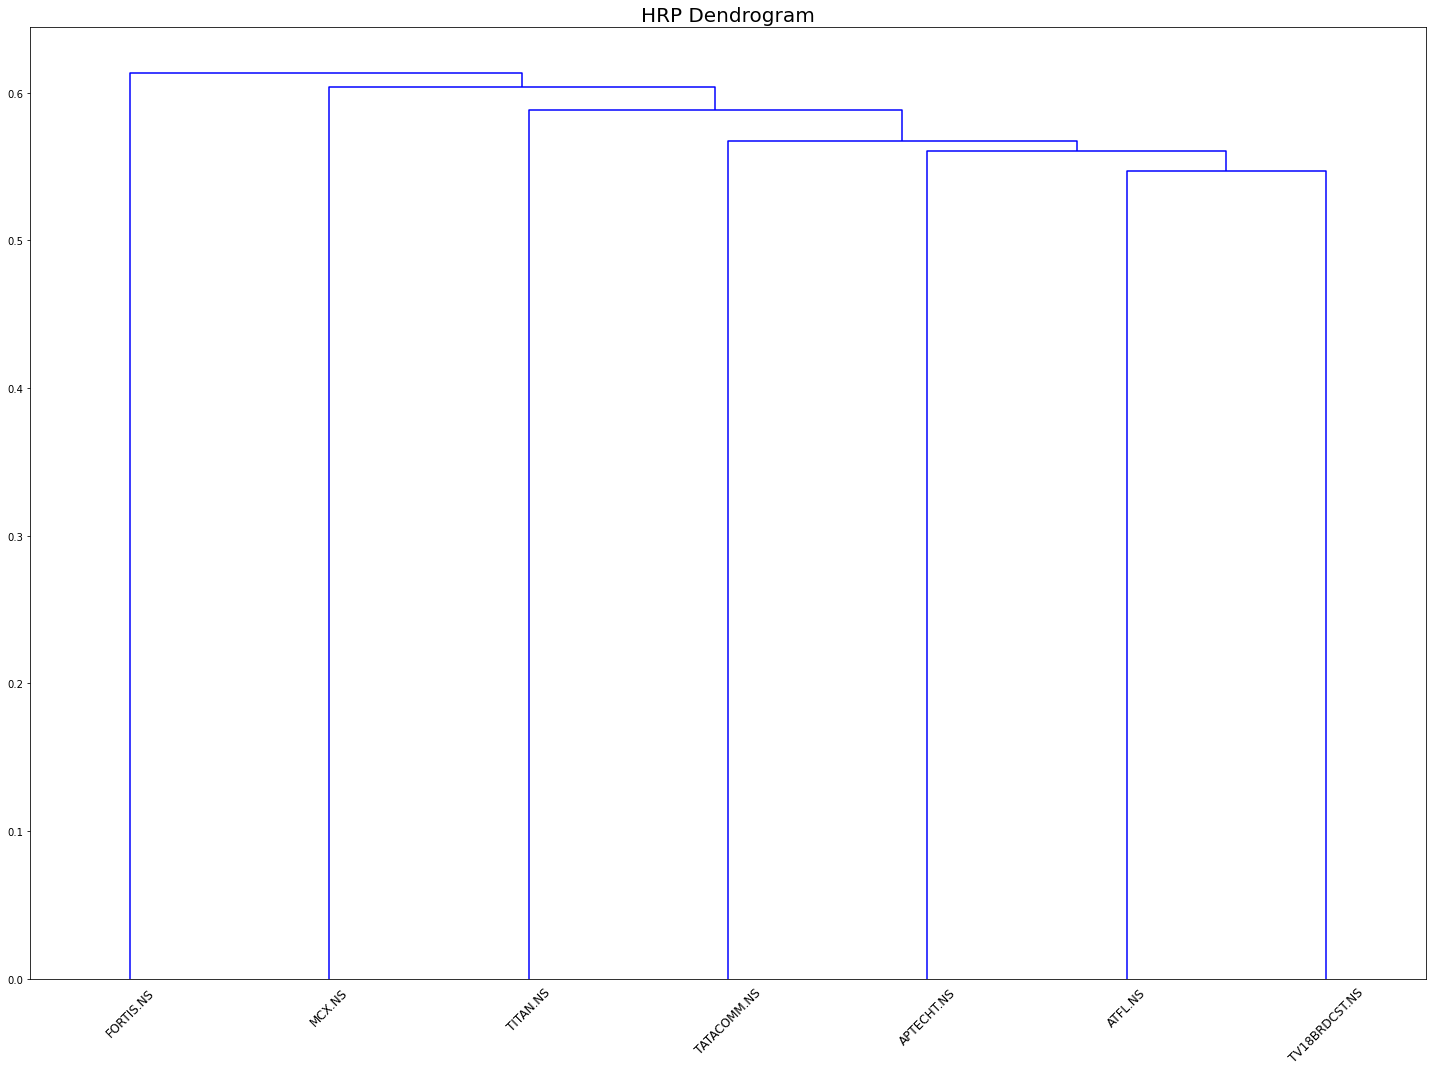

In [29]:
plt.figure(figsize=(20,15))
hrp.plot_clusters(stock_prices.columns)
plt.title('HRP Dendrogram', size=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Custom Inputs

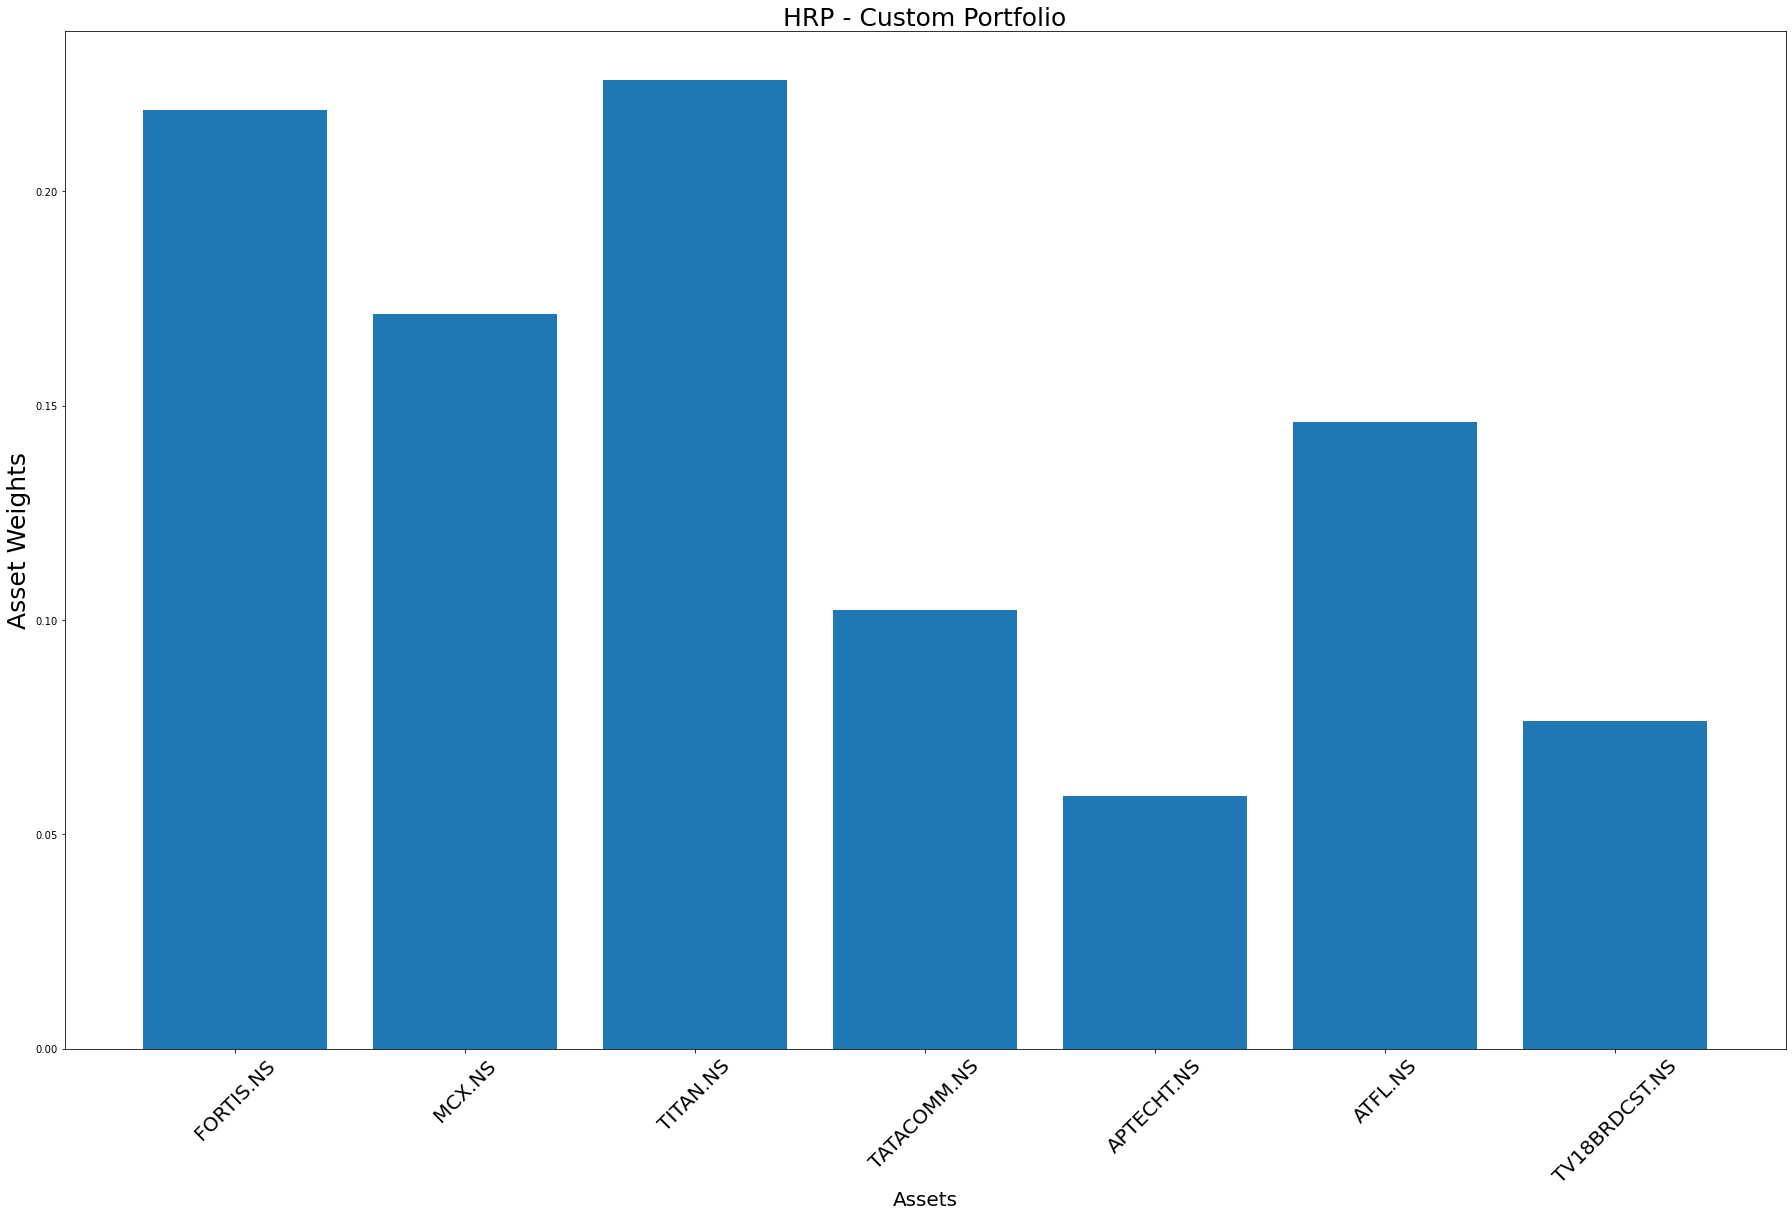

In [30]:

from portfoliolab.estimators import ReturnsEstimators


returns = ReturnsEstimators.calculate_returns(stock_prices)


cov = returns.cov()


hrp_custom = HierarchicalRiskParity()
hrp_custom.allocate(asset_names=stock_prices.columns,
                    asset_returns=returns,
                    covariance_matrix=cov)


hrp_custom_weights = hrp_custom.weights
y_pos = np.arange(len(hrp_custom_weights.columns))

plt.figure(figsize=(25,17))
plt.bar(list(hrp_custom_weights.columns), hrp_custom_weights.values[0])
plt.xticks(y_pos, rotation=45, size=20)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=25)
plt.title('HRP - Custom Portfolio', size=25)
plt.tight_layout()
plt.show()

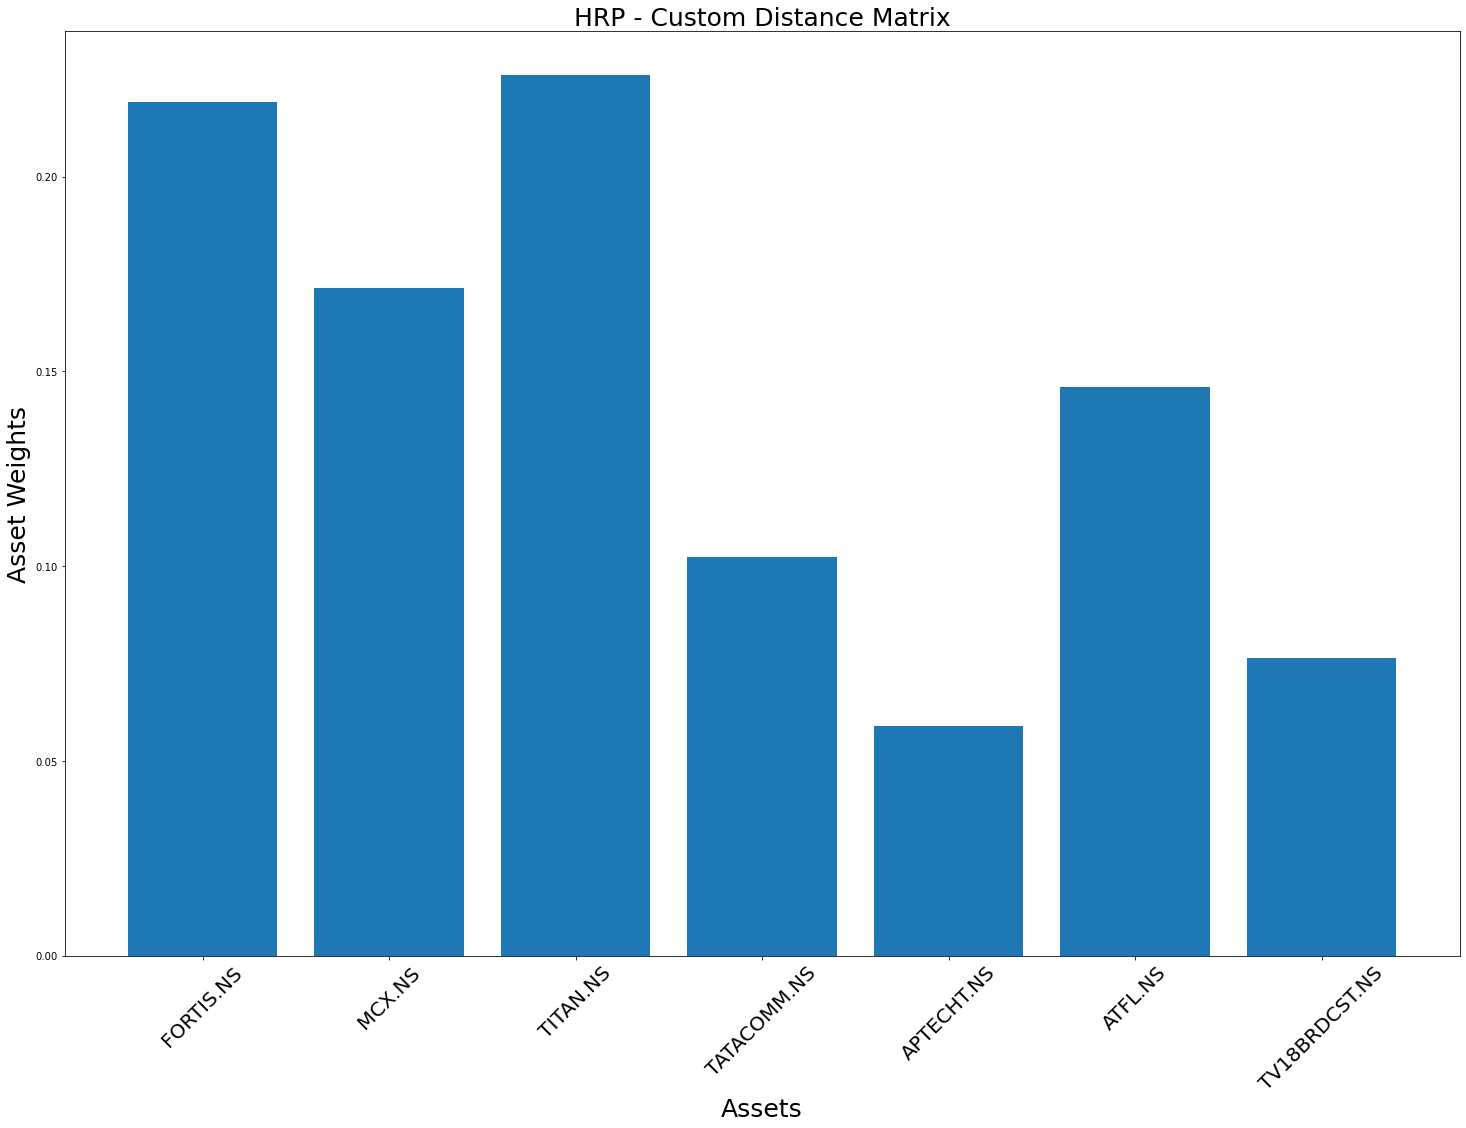

In [31]:
from portfoliolab.estimators import RiskEstimators


corr = RiskEstimators.cov_to_corr(cov)
distance = np.sqrt((1 - corr).round(5) / 2)


hrp_distance = HierarchicalRiskParity()
hrp_distance.allocate(asset_names=stock_prices.columns,
                      distance_matrix=distance, 
                      covariance_matrix=cov)


hrp_distance_weights = hrp_distance.weights
y_pos = np.arange(len(hrp_distance_weights.columns))

plt.figure(figsize=(25,17))
plt.bar(list(hrp_distance_weights.columns), hrp_distance_weights.values[0])
plt.xticks(y_pos, rotation=45, size=20)
plt.xlabel('Assets', size=25)
plt.ylabel('Asset Weights', size=25)
plt.title('HRP - Custom Distance Matrix', size=25)
plt.show()

In [32]:
side_weights = pd.Series([1]*stock_prices.shape[1], index=stock_prices.columns)


side_weights.loc[stock_prices.columns[:4]] = -1

print(side_weights)

APTECHT.NS      -1
ATFL.NS         -1
FORTIS.NS       -1
MCX.NS          -1
TATACOMM.NS      1
TITAN.NS         1
TV18BRDCST.NS    1
dtype: int64


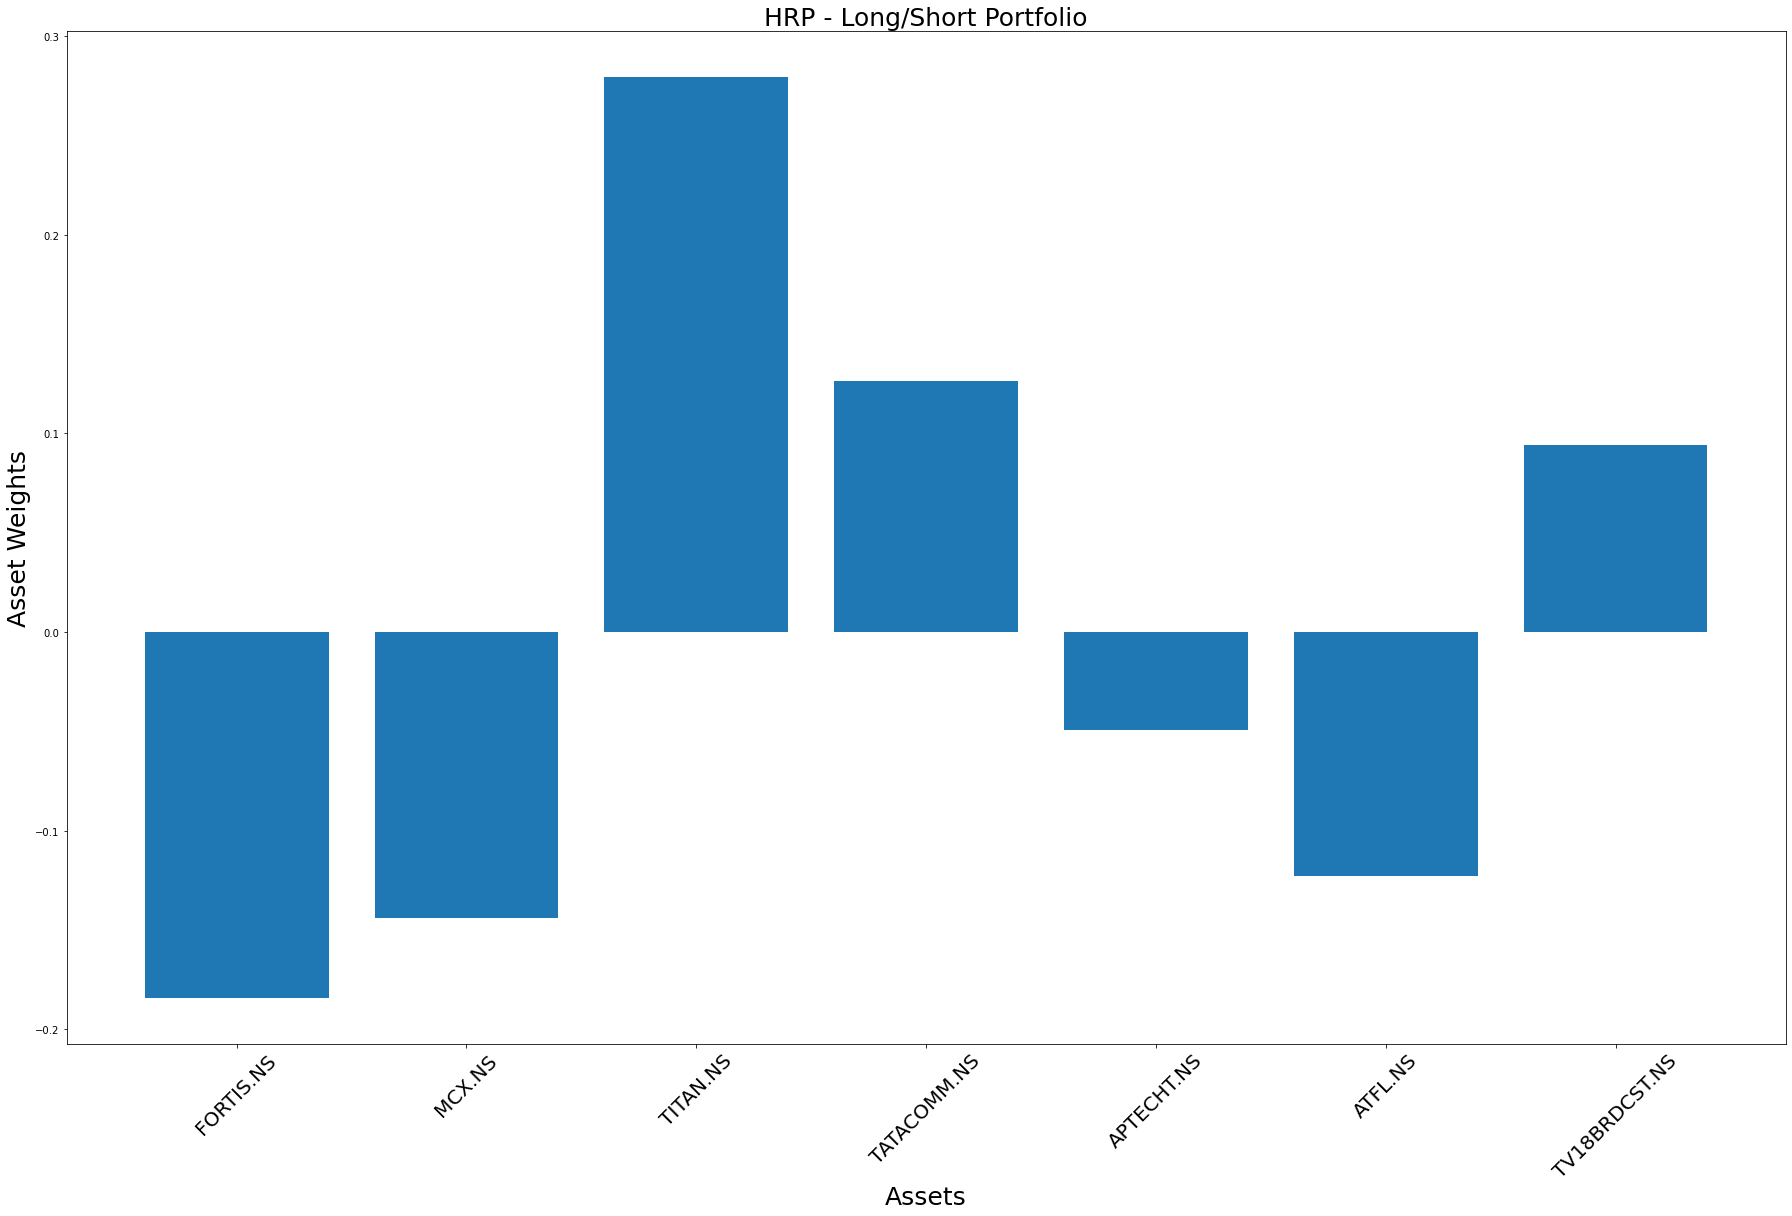

In [33]:

hrp_ls = HierarchicalRiskParity()
hrp_ls.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                side_weights=side_weights)


hrp_ls_weights = hrp_ls.weights
y_pos = np.arange(len(hrp_ls_weights.columns))

plt.figure(figsize=(25,17))
plt.bar(list(hrp_ls_weights.columns), hrp_ls_weights.values[0])
plt.xticks(y_pos, rotation=45, size=20)
plt.xlabel('Assets', size=25)
plt.ylabel('Asset Weights', size=25)
plt.title('HRP - Long/Short Portfolio', size=25)
plt.tight_layout()
plt.savefig('HRP Long-Short Portfolio')
plt.show()

In [34]:
returns = ReturnsEstimators.calculate_returns(stock_prices).mean()
print(returns)

APTECHT.NS       0.007133
ATFL.NS          0.003450
FORTIS.NS        0.002568
MCX.NS           0.002964
TATACOMM.NS      0.005864
TITAN.NS         0.006837
TV18BRDCST.NS    0.002324
dtype: float64


In [35]:
returns.mean()

0.004448477290551537

In [36]:
# risk-free rate of return = 5%
volatility=returns.std()*np.sqrt(252)
sharpe_ratio=(returns.mean() - 0.05) / volatility
sharpe_ratio

-1.3742093739796493

In [37]:
rolling_max = returns.rolling(252, min_periods=1).max()
drawdown = returns/rolling_max - 1.0
print(drawdown)

APTECHT.NS       0.000000
ATFL.NS         -0.516347
FORTIS.NS       -0.639922
MCX.NS          -0.584479
TATACOMM.NS     -0.177827
TITAN.NS        -0.041480
TV18BRDCST.NS   -0.674115
dtype: float64


In [38]:
drawdown.mean()

-0.3763100992821217

In [ ]:
Equal Weight Portfolio Model

In [177]:
w=stock_prices


In [178]:
# def equal_weighted_portfolio(w, V):
#     return [1.0/len(w)]*len(w)

Black Litterman Model

In [59]:
from portfoliolab.bayesian import VanillaBlackLitterman

In [60]:

from portfoliolab.estimators import ReturnsEstimators


returns = ReturnsEstimators.calculate_returns(stock_prices)
returns.mean()

APTECHT.NS       0.007133
ATFL.NS          0.003450
FORTIS.NS        0.002568
MCX.NS           0.002964
TATACOMM.NS      0.005864
TITAN.NS         0.006837
TV18BRDCST.NS    0.002324
dtype: float64

In [61]:
#Table 1
corr=returns.corr()

corr

,APTECHT.NS,ATFL.NS,FORTIS.NS,MCX.NS,TATACOMM.NS,TITAN.NS,TV18BRDCST.NS
APTECHT.NS,1.000000,0.273303,0.247106,0.160683,0.245790,0.250860,0.371152
ATFL.NS,0.273303,1.000000,0.164924,0.212567,0.232881,0.307417,0.401610
FORTIS.NS,0.247106,0.164924,1.000000,0.156463,0.100896,0.205555,0.235648
MCX.NS,0.160683,0.212567,0.156463,1.000000,0.270810,0.135870,0.222141
TATACOMM.NS,0.245790,0.232881,0.100896,0.270810,1.000000,0.152716,0.356403
TITAN.NS,0.250860,0.307417,0.205555,0.135870,0.152716,1.000000,0.289415
TV18BRDCST.NS,0.371152,0.401610,0.235648,0.222141,0.356403,0.289415,1.000000


In [62]:
#Table 2
volatilities=returns.std()*np.sqrt(252)
print(volatilities)


APTECHT.NS       1.229564
ATFL.NS          0.738731
FORTIS.NS        0.766702
MCX.NS           0.813964
TATACOMM.NS      0.932785
TITAN.NS         0.708669
TV18BRDCST.NS    1.022178
dtype: float64


In [63]:
covariance = volatilities.dot(volatilities.T) * corr


In [64]:
aptech= 984/(984+153001+37799)
print(aptech)
titan=153001/(153001+984+37799)
print(titan)
tata=37799/(37799+153001+984)
print(tata)
mcx=7885/(7885+17560+2360+7860)
print(mcx)
fortis=17560/(7885+17560+2360+7860)
print(fortis)
agro=2360/(7885+17560+2360+7860)
print(agro)
tv18=7860/(7885+17560+2360+7860)
print(tv18)

0.005130772118633463
0.7977777082551204
0.1970915196262462
0.22108509743445956
0.4923594560493481
0.06617131641665498
0.22038413009953736


In [65]:
market_weights = pd.DataFrame([0.005130772118633463, 0.7977777082551204, 0.1970915196262462, 0.22108509743445956,0.4923594560493481, 
                              0.06617131641665498, 0.22038413009953736],
                              index=stock_prices.columns, columns=["CapWeight"])
market_weights

,CapWeight
APTECHT.NS,0.005131
ATFL.NS,0.797778
FORTIS.NS,0.197092
MCX.NS,0.221085
TATACOMM.NS,0.492359
TITAN.NS,0.066171
TV18BRDCST.NS,0.220384


In [68]:
views=[0.01]
pick_list=[
        {
            "MCX.NS": 1.0,
            "FORTIS.NS": -market_weights.loc["FORTIS.NS"]/(market_weights.loc["FORTIS.NS"] + \
                                                market_weights.loc["ATFL.NS"] + \
                                                market_weights.loc["TV18BRDCST.NS"]),
            "ATFL.NS": -market_weights.loc["ATFL.NS"] / (market_weights.loc["FORTIS.NS"] + \
                                                market_weights.loc["ATFL.NS"] + \
                                                market_weights.loc["TV18BRDCST.NS"]),
            "TV18BRDCST.NS": -market_weights.loc["TV18BRDCST.NS"] / (market_weights.loc["FORTIS.NS"] + \
                                                market_weights.loc["ATFL.NS"] + \
                                                market_weights.loc["TV18BRDCST.NS"])
        }
]


In [70]:
bl = VanillaBlackLitterman()
bl.allocate(covariance=covariance,
            market_capitalised_weights=market_weights,
            investor_views=views,
            pick_list=pick_list,
            asset_names=covariance.columns,
            tau=0.05,
            risk_aversion=1)

In [71]:
print(bl.implied_equilibrium_returns)

   APTECHT.NS   ATFL.NS  FORTIS.NS    MCX.NS  TATACOMM.NS  TITAN.NS  \
0       3.016  6.310127   2.746519  3.512964     4.853811   2.98983   

   TV18BRDCST.NS  
0       4.768236  


In [72]:
print(bl.posterior_expected_returns)

   APTECHT.NS   ATFL.NS  FORTIS.NS    MCX.NS  TATACOMM.NS  TITAN.NS  \
0    2.915588  5.877416    2.62174  4.145767     4.883217  2.868999   

   TV18BRDCST.NS  
0       4.560377  


In [93]:
a=bl.posterior_expected_returns.mean()
a.mean()

3.981871961992464

In [96]:
volatility=a.std() * np.sqrt(252)
print(volatility)
sharpe_ratio=(a.mean() - 0.01) / volatility
print(sharpe_ratio)

19.434056784575674
0.20437688363372694


In [97]:
rolling_max = a.rolling(252, min_periods=1).max()
drawdown = a/rolling_max - 1.0
print(drawdown)

APTECHT.NS       0.000000
ATFL.NS          0.000000
FORTIS.NS       -0.553930
MCX.NS          -0.294628
TATACOMM.NS     -0.169156
TITAN.NS        -0.511860
TV18BRDCST.NS   -0.224085
dtype: float64


In [98]:
drawdown.mean()

-0.25052259412706357